In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, ICRS

Assume we have an observer in Tai Mountain.

In [4]:
taishan = EarthLocation(lat=36.2*u.deg, lon=117.1*u.deg, height=1500*u.m)

The observing period is the whole year of -2000 B.C.E. ~ 0 B.C.

In [5]:
year_arr = np.arange(0, 2000, 1)

# Number of days for every year
date_nb = np.ones_like(year_arr)
date_nb = np.where(year_arr % 4 == 0, 366, 365)
date_nb = np.where((year_arr % 100 == 0) & (
    year_arr % 400 != 0), 365, date_nb)

total_date_nb = np.zeros_like(year_arr)
for i in range(year_arr.size):
    total_date_nb[i] = np.sum(date_nb[:i+1])
    
vernal_equinox = Time("0000-03-21 00:00:00") - total_date_nb * u.day
autumnal_equinox = Time("0000-09-23 00:00:00") - total_date_nb * u.day
vernal_equinox, autumnal_equinox

(<Time object: scale='utc' format='iso' value=['-1-03-21 00:00:00.000' '-2-03-21 00:00:00.000' '-3-03-21 00:00:00.000'
  ... '-1998-03-21 00:00:00.000' '-1999-03-21 00:00:00.000'
  '-2000-03-21 00:00:00.000']>,
 <Time object: scale='utc' format='iso' value=['-1-09-23 00:00:00.000' '-2-09-23 00:00:00.000' '-3-09-23 00:00:00.000'
  ... '-1998-09-23 00:00:00.000' '-1999-09-23 00:00:00.000'
  '-2000-09-23 00:00:00.000']>)

I calculate the altitude and azimuth of Sun and Canopus in autumnal equinox and in vernal equinox for every year.

In [ ]:
# For Vernal equinox
year_arr = np.arange(0, 2000, 1)

# Number of days for every year
date_nb = np.ones_like(year_arr)
date_nb = np.where(year_arr % 4 == 0, 366, 365)
date_nb = np.where((year_arr % 100 == 0) & (
    year_arr % 400 != 0), 365, date_nb)

total_date_nb = np.zeros_like(year_arr)
for i in range(year_arr.size):
    total_date_nb[i] = np.sum(date_nb[:i+1])
    
vernal_equinox = Time("0000-03-21 00:00:00") - total_date_nb * u.day

# Calculate the highest altitude
max_alt_ver = np.zeros_like(vernal_equinox)

for i, obs_timei in enumerate(vernal_equinox):
    
    # Calculate the midnight epoch in Bejing time
    utcoffset = +8 * u.hour  # Beijing Daylight Time
    midnight = obs_timei - utcoffset

    # Position of the Canopus with the proper motion correction at the beginning of the year.
    # This effect is very small.
    dt_epoch = obs_timei.jyear - 2000.0
    ra = 95.98787790 * u.deg + 19.93 * u.mas * dt_epoch
    dec = -52.69571787 * u.deg + 23.24 * u.mas * dt_epoch
    hip30438 = SkyCoord(ra=ra, dec=dec, frame="icrs")
    
    delta_midnight = np.arange(0, 24, 1./60) * u.hour
    # Vernal
    obser_time1 = midnight + delta_midnight
    local_frame1 = AltAz(obstime=obser_time1,
                        location=taishan)
    hip30438altazs1 = hip30438.transform_to(local_frame1)
    
#     max_time_ver[i] = 
    max_alt_ver[i] = hip30438altazs1.alt.max().value

In [ ]:
year_arr = np.arange(0, 2000, 1)

# Number of days for every year
date_nb = np.ones_like(year_arr)
date_nb = np.where(year_arr % 4 == 0, 366, 365)
date_nb = np.where((year_arr % 100 == 0) & (
    year_arr % 400 != 0), 365, date_nb)

total_date_nb = np.zeros_like(year_arr)
for i in range(year_arr.size):
    total_date_nb[i] = np.sum(date_nb[:i+1])
    
autumnal_equinox = Time("0000-09-23 00:00:00") - total_date_nb * u.day

# Calculate the observable time of everyday
max_alt_aut = np.zeros_like(autumnal_equinox)

for i, obs_timei in enumerate(autumnal_equinox):
    utcoffset = +8 * u.hour  # Daylight Time
    midnight = obs_timei - utcoffset

    # Position of the Canopus with the proper motion correction at the beginning of the year.
    # This effect is very small.
    dt_epoch = obs_timei.jyear - 2000.0
    ra = 95.98787790 * u.deg + 19.93 * u.mas * dt_epoch
    dec = -52.69571787 * u.deg + 23.24 * u.mas * dt_epoch
    hip30438 = SkyCoord(ra=ra, dec=dec, frame="icrs")
    
    delta_midnight = np.arange(0, 24, 1./60) * u.hour
        
    # Autumnal
    obser_time2 = midnight + delta_midnight
    local_frame2 = AltAz(obstime=obser_time2,
                        location=taishan)
    
    hip30438altazs2 = hip30438.transform_to(local_frame2)
    
    max_alt_aut[i] = hip30438altazs2.alt.max().value

I assume that the Canopus can be observed by the local observer only when the observable duration in one day is longer than 10 minitues.
With such an assumption, I determine the observable period of the Canopus.

In [ ]:
# Save data
np.save("multi_epoch_altitude_output",
        [autumnal_equinox.jyear, max_alt_aut, vernal_equinox.jyear, max_alt_ver])

In [8]:
autumnal_equinox, max_alt_aut, vernal_equinox, max_alt_ver = np.load("multi_epoch_altitude_output.npy")

max_alt_ver0 = np.zeros_like(max_alt_ver)
for i, max_alt_veri in enumerate(max_alt_ver):
    max_alt_ver0[i] = max_alt_ver[i].value
    
max_alt_aut0 = np.zeros_like(max_alt_aut)
for i, max_alt_auti in enumerate(max_alt_aut):
    max_alt_aut0[i] = max_alt_aut[i].value


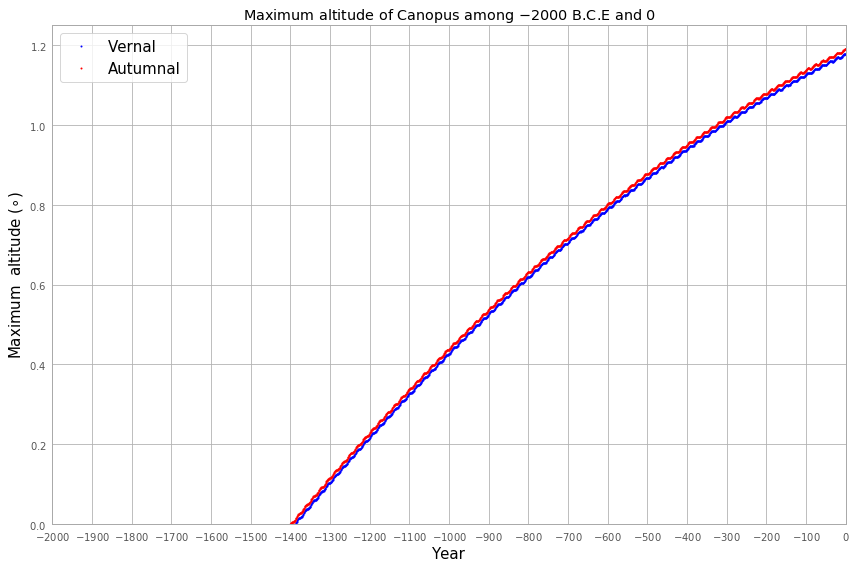

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(vernal_equinox, max_alt_ver0,
        "b.", ms=2, label="Vernal")
ax.plot(autumnal_equinox, max_alt_aut0,
        "r.", ms=2, label="Autumnal")

# ax.plot(autumnal_equinox.jyear, obs_dur1,
#           "b.", ms=3, label="Vernal")
# ax.plot(autumnal_equinox.jyear, obs_dur2,
#           "r.", ms=3, label="Autumnal")

# ax.fill_between(autumnal_equinox.jyear, 0, 24,
#                  (obs_dur1 >= 1./6) & (obs_dur2 >= 1./6), color="0.8", zorder=0)

ax.set_xlabel("Year", fontsize=15)
ax.set_xlim([-2000, 0])
ax.set_xticks(np.arange(-2000, 1, 100))

ax.set_ylim([0, 1.25])
ax.set_ylabel("Maximum  altitude ($\circ$)", fontsize=15)
ax.set_title("Maximum altitude of Canopus among $-2000$ B.C.E and 0")

ax.legend(fontsize=15)

fig.tight_layout()
plt.savefig("muilti_epoch_altitude.eps", dpi=100)
plt.savefig("muilti_epoch_altitude.png", dpi=100)